In [2]:
import help_functions as hf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def low_border(x : np.ndarray, num):
    lb = x.searchsorted(num, side='left')
    rb = x.searchsorted(num, side='right')
    if lb==rb:
        return(lb-1)
    else:
        return(max(0,rb-2))

[270, 270]
Q SHAPE:  (270, 270)


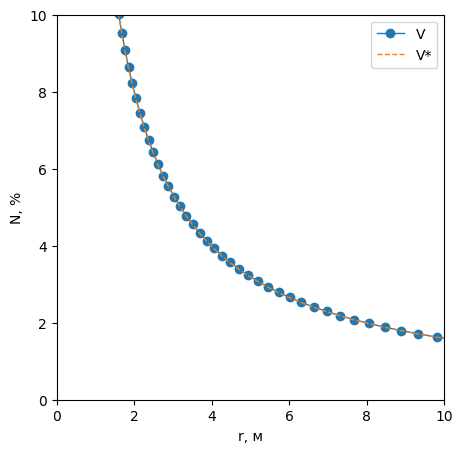

C:\Users\zalevskij.2019\AppData\Local\Temp\807\ipykernel_379160\3754569076.py:27: RuntimeWarning: divide by zero encountered in divide
  ax.plot(r,abs(q[0]-q_a)/abs(q[0])*100, "--",color='blue')


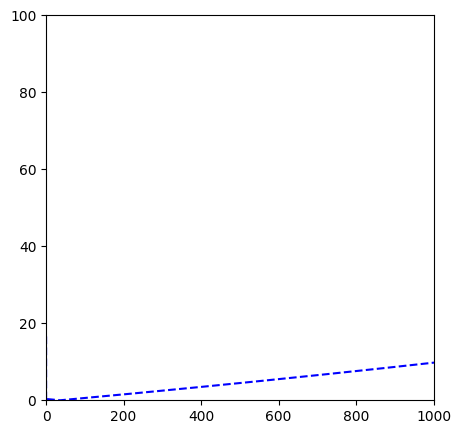

9.799084050043064 1.62816926745121 1.6241818345378505


In [7]:
r,z,q = hf.solution_rz_read("../rz_optim/optim/q_rz")
r=r[1:]
q = q[:,1:]
# hf.paint_layer_uniform(r,z,q,(0,0,0,0),0)
q_a = 1/(2*np.pi*r*1e-2)

fig,ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("r, м")
ax.set_ylabel("V")

ax.plot(r,q[0], "-o", linewidth = 1)
ax.plot(r,q_a,"--", linewidth = 1)
ax.set_xlim(0,10)
ax.set_ylim(0,10)

ax.legend(("V","V*"))
plt.show()  

# fig,ax = plt.subplots(figsize=(6,6))
# ax.plot(r,q[0],color='green')
# ax.plot(r,r_a, color='red')
# ax.set_xlim(0,10)
# ax.set_ylim(0,10)
# plt.show()

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(r,abs(q[0]-q_a)/abs(q[0])*100, "--",color='blue')
ax.set_xlim(0,1000)
ax.set_ylim(0,100)

ax.set_xlabel("r, м")
ax.set_ylabel("N, %")
plt.show()


point = low_border(r,10)
print(r[point], q[0][point],q_a[point])

[176, 176]
Q SHAPE:  (176, 176)
1.1026564319570316 14.601689544288282 14.433774517545944 0.011499698458389827
[223, 223]
Q SHAPE:  (223, 223)
1.0162813885540913 15.73190565518013 15.660519309355072 0.0045376795023908695
[270, 270]
Q SHAPE:  (270, 270)
1.0207902624036946 15.64416066249616 15.5913461318809 0.0033759900422061285
[318, 318]
Q SHAPE:  (318, 318)
1.0290038252545208 15.517375034377519 15.4668951840416 0.003253117890370257
[365, 365]
Q SHAPE:  (365, 365)
1.0211094089048653 15.63716347400361 15.586473075650945 0.0032416619828102055


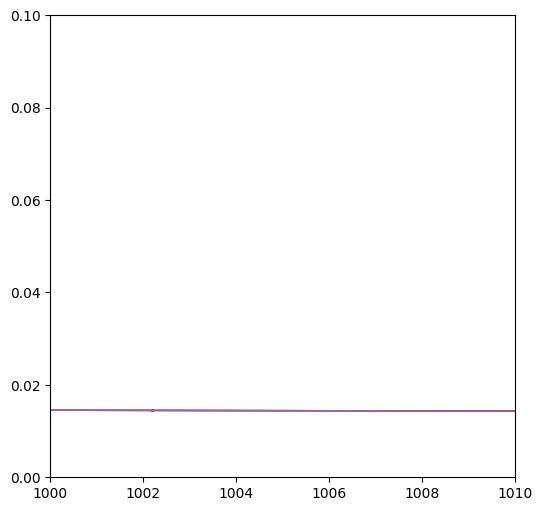

In [10]:
#Тест rz optim : h0
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim(1000,1010)
ax.set_ylim(0,0.1)
for i in range(1,6):
    r,z,q = hf.solution_rz_read("../rz_optim/h0/1e-"+str(i))
    r=r[1:]
    q = q[:,1:]
    q_a = 1/(2*np.pi*r*1e-2)
    ax.scatter(r,q[0], marker = 'o', s=2)
    ax.plot(r,q[0], linewidth = 1)
    point = low_border(r,1)
    print(r[point], q[0][point],q_a[point], abs(q_a[point]-q[0][point])/abs(q[0][point]))
plt.show()

[1159, 1159]
Q SHAPE:  (1159, 1159)
993.6353723241934 0.014563579819569792 0.016017439346952704 0.0998284450248482
[618, 618]
Q SHAPE:  (618, 618)
997.778456772673 0.014507911965923577 0.01595092998967767 0.09946421146912636
[428, 428]
Q SHAPE:  (428, 428)
977.7281892833413 0.014845698998152584 0.016278035637752587 0.0964815897034046
[330, 330]
Q SHAPE:  (330, 330)
992.9575563474764 0.01460452903472798 0.016028373224464446 0.09749333144196012
[270, 270]
Q SHAPE:  (270, 270)
963.5096648506654 0.015104220429895676 0.016518250817604697 0.09361823036627835
[230, 230]
Q SHAPE:  (230, 230)
953.5507863519125 0.015284907145281128 0.01669076732669784 0.09197701811690372
[200, 200]
Q SHAPE:  (200, 200)
941.5316225298025 0.015505568295057753 0.016903834059684764 0.0901782984034641
[178, 178]
Q SHAPE:  (178, 178)
947.9219660258999 0.01539697238767971 0.01678987815412084 0.09046621188693559
[161, 161]
Q SHAPE:  (161, 161)
968.3898654479076 0.01504529654965228 0.016435007094821433 0.0923684382413367

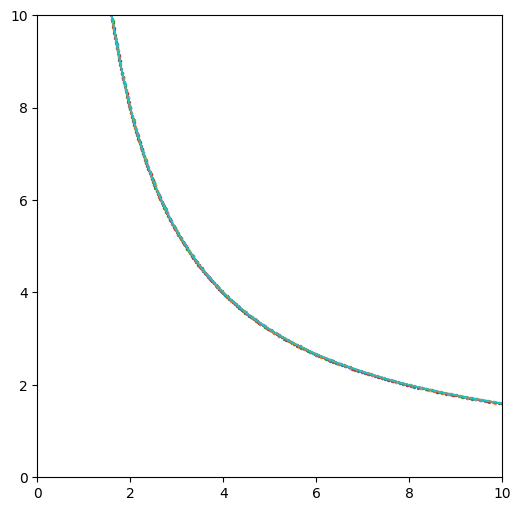

In [79]:
#Тест rz optim : k
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0,10)
ax.set_ylim(0,10)
for i in range(1,11):
    r,z,q = hf.solution_rz_read("../rz_optim/k/1_%02d"%i)
    r=r[1:]
    q = q[:,1:]
    q_a = 1/(2*np.pi*r*1e-2)
    ax.scatter(r,q[0], marker = 'o', s=2)
    ax.plot(r,q[0], linewidth = 1)
    
    point = low_border(r,1000)
    print(r[point], q[0][point],q_a[point], abs(q_a[point]-q[0][point])/abs(q[0][point]))
plt.show()

In [76]:
num = 2
x = np.array([0,0.1,0.3,0.6,1.,2.])
for i in x:
    low_border(x,i)
print()
for i in range(len(x)-1):
    num = (x[i]+x[i+1])/2
    low_border(x,num)
# print(np.array(x).searchsorted(num,side='left'))
# print(np.array([0,0.1,0.3,0.6,1.,2.]).searchsorted(num,side='right'))

0
0
1
2
3
4

0
1
2
3
4
